<a href="https://colab.research.google.com/github/Jorge-89/Data-Science-CoderHouse/blob/main/Titanic_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## El RMS Titanic​ 
Fue un transatlántico británico, el mayor barco de pasajeros del mundo al finalizar su construcción, que se hundió durante la noche del 14 y la madrugada del 15 de abril de 1912 durante su viaje inaugural desde Southampton a Nueva York. En el hundimiento del Titanic murieron 1496 personas de las 2208 que iban a bordo, lo que convierte a esta catástrofe en uno de los mayores naufragios de la historia ocurridos en tiempos de paz.

Fuente: Wikipedia


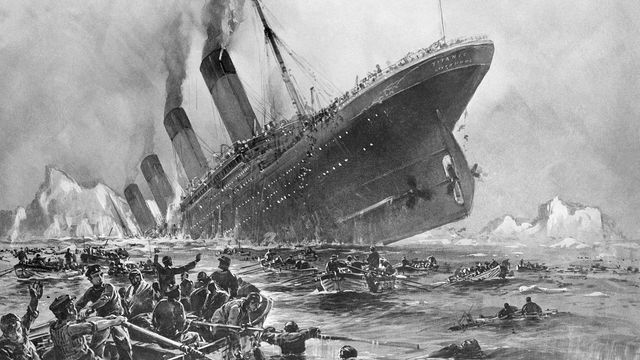

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:

#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Data-Science-CoderHouse/main/train.csv'
df = pd.read_csv(url, sep =",")



In [3]:
# muestra las columnas del df
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# Observamos que tenemos 891 filas y 12 columnas
df.shape

(891, 12)

# **Datos**

**Veamos cada columna:**

**PassengerId:** Identificador de pasajero

**Survived**: 0 = No sobrevivió, 1 = sobrevivió 

**Pclass:** Clase, donde 1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase.

**Sex:** Masculino o Femenino

**Age:** Edad en años, en fracción si es menor de 1

**SibSp:** Número de hermanos o cónyuges a bordo del titanic

**Parch:** Número de padres o hijos a bordo del titanic

**Ticket:** Número de ticket de pasajero

**Fare:** Tarifa de pasajero

**Cabin:** Número de cabina

**Embarked:** Punto de embarque, donde C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
#muestra las primeras 5 filas del df
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#muestra las últimas 5 filas del df
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:

#observamos la cantidad de datos  por cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:

print("Cantidad inicial de personas", len(df["PassengerId"]))
df_sobrevive = df[df['Survived'] == 1]
print("Cantidad de personas que sobrevivieron", len(df_sobrevive))
print("Cantidad de personas que NO sobrevivieron", len(df["PassengerId"])-len(df_sobrevive))





Cantidad inicial de personas 891
Cantidad de personas que sobrevivieron 342
Cantidad de personas que NO sobrevivieron 549


In [30]:
#
data= np.unique(df.Pclass, return_counts=True)
data


(array([1, 2, 3]), array([216, 184, 491]))

In [89]:
for i in range(3):
  print("Pasajeros que sobrevivieron en ", i+1, " clase: ", len(df[(df["Pclass"] ==1+i) & (df["Survived"]==1)]), " de un total de:", data[1][i])

Pasajeros que sobrevivieron en  1  clase:  136  de un total de: 216
Pasajeros que sobrevivieron en  2  clase:  87  de un total de: 184
Pasajeros que sobrevivieron en  3  clase:  119  de un total de: 491


# **Parece ser que la clase influyo en quienes primero fueron a los botes**

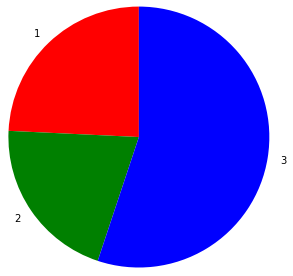

In [51]:
#Gráficas de pastel con Matplotlib

"""
Las gráficas de barras y/o pastel nos sirven para representar porcentajes y proporciones. En Python podemos utilizar la librería Matplotlib para desarrollar este tipo de gráficas.

Matplotlib dispone de la función pie, cuya sintaxis depende del grado de personalización y control que se requiera sobre la gráfica de pastel a dibujar.
"""

plt.pie(x=data[1], labels=data[0], colors=["Red","Green", "Blue"],startangle=90, radius=1.5)
plt.show()
#radius es el tamaño del circulo, angle es donde queremos que empiece el angulo

Text(0.5, 0, 'Pclass')

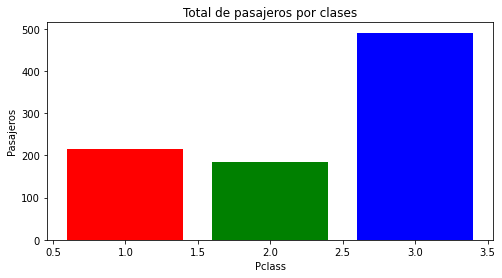

In [62]:
fig, ax = plt.subplots(figsize=(8,4),)
ax.bar( data[0], data[1],color=["Red","Green", "Blue"])
ax.set_title('Total de pasajeros por clases')
ax.set_ylabel('Pasajeros')
ax.set_xlabel('Pclass')

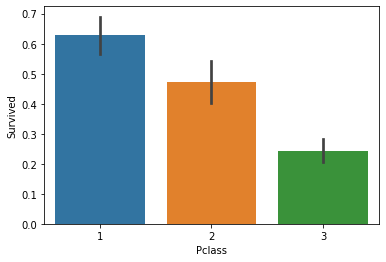

In [9]:
#Veamos en barras la proporción de personas que sobrevivieron segun las clases.
sns.barplot(x='Pclass', y='Survived', data=df)

In [10]:

#primer análisis, estámos ignorando las edades faltantes
#usamos filtros y contamos el  número de hombres y mujeres que habian en el barco


women = df[df['Sex']=='female']
men = df[df['Sex']=='male']

print("Cantidad de mujeres:", len(women))
print("Cantidad de hombres", len(men))






Cantidad de mujeres: 314
Cantidad de hombres 577


Text(0.5, 1.0, 'Hombres')

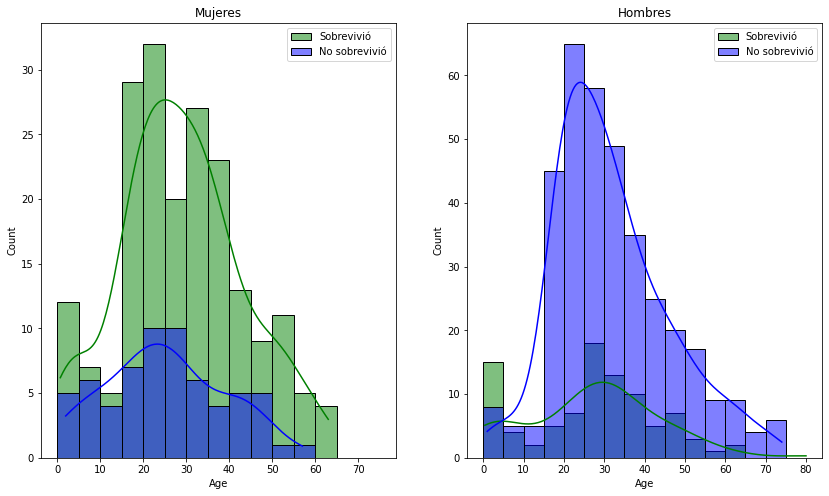

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14, 8))
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=np.arange(0, 80, 5), label = "Sobrevivió", color='g', ax = axes[0], kde =True)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=np.arange(0, 80, 5), label = "No sobrevivió", color='b', ax = axes[0], kde = True)
ax.legend()
ax.set_title('Mujeres')

ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=np.arange(0, 80, 5), label = "Sobrevivió",  color='g',ax = axes[1], kde = True)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=np.arange(0, 80, 5), label = "No sobrevivió",  color='b',ax = axes[1], kde = True)
ax.legend()
ax.set_title('Hombres')

In [12]:
# Hay muchos datos faltantes en edad, qué podemos hacer?
# La función pandas.isnull detecta valores perdidos

df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [13]:
#podemos construir un df, que se llame edad y contenga los datos de las edades y luego obtener la media.
edad= df["Age"]
df[["Age"]].mean()




Age    29.699118
dtype: float64

In [14]:
type(edad) #verificamos que este bien el tipo de dato

pandas.core.series.Series

In [15]:
# La función pandas.DataFrame.fillna() reemplaza los valores NaN en DataFrame con algún valor determinado.
# En nuestro caso usaremos el valor de la media
edad=edad.fillna(29.69)





In [16]:
df = df.drop('Age', axis = 1) #elimino la columna Age del df original que contienen valores faltantes.
data_frame_final=pd.concat([df,edad], axis=1) #construyo un nuevo df con los valores de Age sin datos faltantes mediante la función pd.concat
data_frame_final

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.00
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.00
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.00
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.00
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.00
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S,27.00
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,19.00
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,29.69
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,26.00


In [17]:
data_frame_final.isnull().sum().sort_values(ascending = False)
#podemos observar que datos faltantes en Age es igual a 0. Funcionó!!!

Cabin          687
Embarked         2
Age              0
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB
